# Lecture 4.4: Logistic Regression for Binary Outcomes

### 🧠 Learning Objectives
- Fit and interpret logistic regression models
- Estimate odds ratios and confidence intervals
- Include categorical and continuous predictors
- Apply to binary health outcomes


## 🔧 Setup and Load Data

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load OHIE and Framingham datasets
OHIE = pd.read_csv("../Data/OHIE_12m.csv")

## 🎯 1. Binary Outcome: Depression indicator

Is depression (PHQ2 > cutoff) associated with household income (% fpl)?

In [2]:
OHIE_clean = OHIE.dropna(subset = ['PHQ2_cutoff','treatment'])

In [3]:
OHIE_clean['PHQ2_cutoff'] = OHIE_clean['PHQ2_cutoff'].replace({False:0, True:1})

/var/folders/1_/lcw4zvln3rd_5hb93nn0kqw00000gn/T/ipykernel_47218/4071896601.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  OHIE_clean['PHQ2_cutoff'] = OHIE_clean['PHQ2_cutoff'].replace({False:0, True:1})
/var/folders/1_/lcw4zvln3rd_5hb93nn0kqw00000gn/T/ipykernel_47218/4071896601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OHIE_clean['PHQ2_cutoff'] = OHIE_clean['PHQ2_cutoff'].replace({False:0, True:1})


<Axes: xlabel='treatment', ylabel='PHQ2_cutoff'>

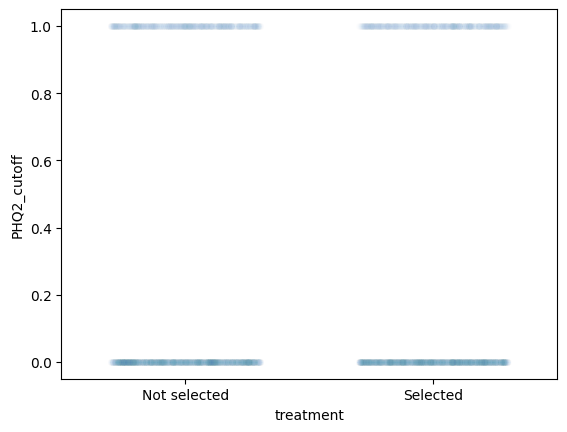

In [11]:
sns.stripplot(data=OHIE_clean, y="PHQ2_cutoff", x="treatment", alpha = .01, jitter = .3)

In [12]:
model1 = smf.logit('PHQ2_cutoff ~ treatment', data = OHIE_clean)
result1 = model1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.617303
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            PHQ2_cutoff   No. Observations:                 3896
Model:                          Logit   Df Residuals:                     3894
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:               0.0006506
Time:                        18:14:56   Log-Likelihood:                -2405.0
converged:                       True   LL-Null:                       -2406.6
Covariance Type:            nonrobust   LLR p-value:                   0.07679
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.7476      0.049    -15.408      0.000      -0.843      -0.

## 2. Interpret as odds ratio

In [14]:
params = result1.params
conf = result1.conf_int()
conf["OR"] = params
conf.columns = ["2.5%", "97.5%", "OR"]
print(np.exp(conf))

                           2.5%     97.5%        OR
Intercept              0.430572  0.520763  0.473525
treatment[T.Selected]  0.771881  1.013347  0.884412


## 3. Add predictors

In [15]:
OHIE_clean = OHIE_clean.dropna(subset = ['PHQ2_cutoff','hhinc_pctfpl_12m','female_list','treatment'])
model2 = smf.logit("PHQ2_cutoff ~ treatment + hhinc_pctfpl_12m + female_list", data=OHIE_clean)
result2 = model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.598585
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            PHQ2_cutoff   No. Observations:                 3522
Model:                          Logit   Df Residuals:                     3518
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                 0.02631
Time:                        18:15:51   Log-Likelihood:                -2108.2
converged:                       True   LL-Null:                       -2165.2
Covariance Type:            nonrobust   LLR p-value:                 1.568e-24
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4965      0.081     -6.107      0.000      -0.656

In [16]:
params = result2.params
conf = result2.conf_int()
conf["OR"] = params
conf.columns = ["2.5%", "97.5%", "OR"]
print(np.exp(conf))

                              2.5%     97.5%        OR
Intercept                 0.518990  0.713794  0.608648
treatment[T.Selected]     0.789982  1.057532  0.914019
female_list[T.1: Female]  1.090578  1.473862  1.267818
hhinc_pctfpl_12m          0.992864  0.995300  0.994081


Findings:

- Being female is associated with 27% higher odds of having PHQ-2 depression than being male, holding the other modeled variables constant
- Going up in income by 1 percent of the federal poverty line is associated with 0.005% lower odds of having PHQ-2 depression
- The treatment effect is not significant

## 4. Add interactions

In [18]:
OHIE_clean = OHIE_clean.dropna(subset = ['PHQ2_cutoff','hhinc_pctfpl_12m','female_list','treatment'])
model3 = smf.logit("PHQ2_cutoff ~ hhinc_pctfpl_12m + treatment * female_list", data=OHIE_clean)
result3 = model3.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.598567
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            PHQ2_cutoff   No. Observations:                 3522
Model:                          Logit   Df Residuals:                     3517
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Apr 2025   Pseudo R-squ.:                 0.02634
Time:                        18:17:23   Log-Likelihood:                -2108.2
converged:                       True   LL-Null:                       -2165.2
Covariance Type:            nonrobust   LLR p-value:                 9.956e-24
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

## 5. Visualize the predicted vs actual observation

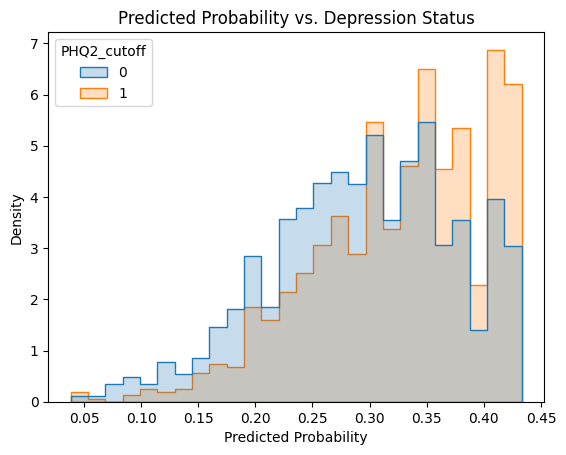

In [20]:
OHIE_clean["fitted_prob_PHQ2"] = result3.predict(OHIE_clean)
sns.histplot(data=OHIE_clean, x="fitted_prob_PHQ2", hue="PHQ2_cutoff", element="step", stat="density", common_norm=False)
plt.title("Predicted Probability vs. Depression Status")
plt.xlabel("Predicted Probability")
plt.show()